# Time Dependent Recalibration

This notebook is dedicated to develop examples about how to perform the
recalibration of a time dependent mass spectrum. This could be performed by 
using two different methods: directly from the `TimeDependentData` class or 
using the `TimeDependentRecalibration` class.

## Import PyC2MC tools

For this data treatment we need:

* `read_caliblist` in order to read the calibration list.
* The `TimeDependentData` object, to manage the time dependent LC-MS data.
* The `TimeDependentCalbration` class to implement the calibration

In [1]:
from pyc2mc.io.caliblist import read_caliblist

from pyc2mc.time_dependent.td_data import TimeDependentData
from pyc2mc.time_dependent.recalibration import TimeDependentCalibration

# standard python tools
import pandas as pd
import matplotlib.pyplot as plt

## Read calibration list

The calibration list is read from a ref file containing the list of
theoretical mz values and associated formula.

Download the [calibration listt](data/eva_cross_calib.ref)

<div class="alert alert-block alert-warning">

This calibration list is used as a pedagogic example and is not suitable for
real data treatment.

</div>

In [2]:
cl = read_caliblist("data/eva_cross_calib.ref")
cl

CalibList (247 peaks) 235.24 -> 1873.41
Calibration Point: 235.24 (C17 H31)
Calibration Point: 285.26 (C21 H33)
Calibration Point: 293.32 (C21 H41)
Calibration Point: 305.28 (C21 H37 O1)
Calibration Point: 309.32 (C21 H41 O1)
Calibration Point: 325.29 (C24 H37)
...
Calibration Point: 1642.16 (C116 H28 O13 N1)
Calibration Point: 1812.59 (C133 H78 O6 N3)
Calibration Point: 1828.77 (C133 H104 O8)
Calibration Point: 1873.41 (C126 H186 O10 N1)
Calibration Point: 1873.41 (C141 H180)

## Read time dependent data

In this example a LC-MS data are calibrated using a customized caliration list. 

The `TimeDependentData` class aims to represent LC-MS data.
To read from a directory_path, use the method `from_directory(directory_path)`. 
It is also possible to read directly a mzxml file using the method `from_MZxml(path)`.

In [3]:
# The verbose option displays the filenames when those are read
EVA_cross_set = TimeDependentData.from_directory(
    directory_path='data/EVA_Cross',
    verbose=False
)

In [4]:
EVA_cross_set.data_summary().head()

retentionTime                mz_bounds  N_peaks         TIC         BPC  \
scan                                                                            
0               0.0   (149.02307, 1990.8096)     2500   13.010008    0.794447   
1               1.0  (149.02284, 1989.98247)     2500   16.450871    1.722891   
2               2.0   (149.0232, 1977.97103)     2500   36.630344    3.599102   
3               3.0  (149.02317, 1977.97083)     2500   65.028066   46.369796   
4               4.0  (149.02356, 1977.96867)     2500  100.000000  100.000000   

       mz_max_I  
scan             
0     193.04925  
1     193.04926  
2     577.13347  
3     481.39970  
4     481.40004

The `EVA_cross_set` variable contains all the scan. You can plot them
one by one or the Total Ion Chromatogram.

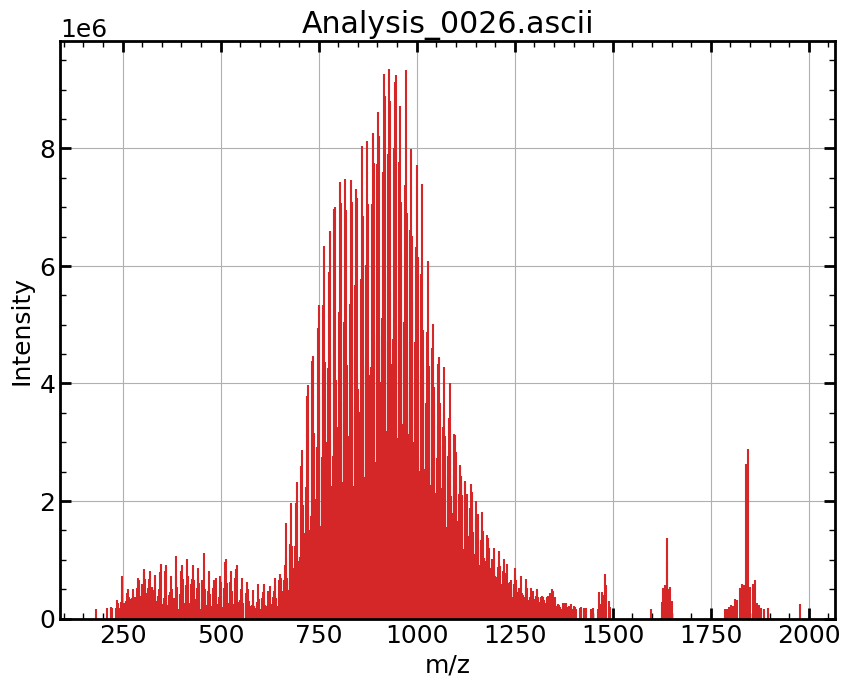

In [5]:
EVA_cross_set[25].plot()

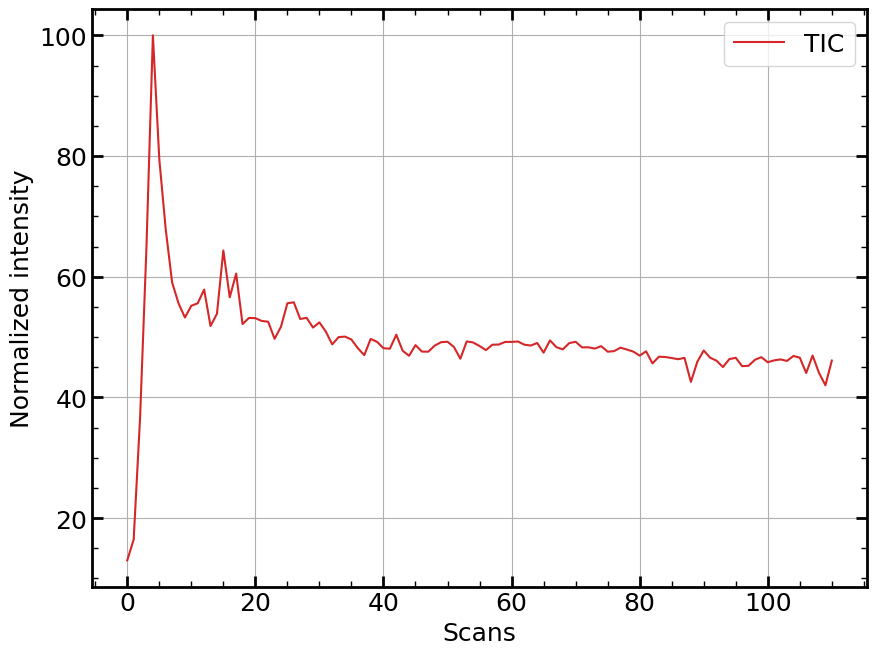

In [6]:
EVA_cross_set.plot()

## Recalibration of the LC-MS data

Thereafter, the `TimeDependdentCalibration` class is used to
perform a recalibration on all the individual scans of the 2D data.

Only mandatory and non default arguments are used. Use `help(TimeDependentCalibration)`
to see all the parameters.

Here, as it is the first calibration step, we use a `searching_mode` corresponding
to the `"most_abundant_corrected"` method along with a `lambda_parameter` of
2 ppm. It means that in that 2 ppm interval, the algorithm will select the most
abundant peak (highest S/N if available or intensity). Then a correction is applied
to discard calibration points with an error larger than the mean error and new
calibration point with an error close to the mean error are selected.

In [7]:
recal2D = TimeDependentCalibration(
    td_data=EVA_cross_set,
    calibration_lists=cl,
    lambda_parameter=2,
    searching_mode="most_abundant_corrected",
    recal_kws=dict(fit_intercept=False, model="poly", deg=2),
    verbose=True
)


                     Scan: 0 (2500 peaks)  10 calib. points                     

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 10
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -1.10284e-09 B: 1.00000e+00
Root mean squared error (ppm): 0.183486
Calibration mz range         : 235.24, 1620.50

peaklist   : (149.02 -> 1990.81) Da
calib. list: (235.24 -> 1620.50) Da

Calibrating peaklist: Analysis_0001.ascii
 2500 peaks (149.02 -> 1990.81) Da

                     Scan: 1 (2500 peaks)  12 calib. points                     

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 12
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -1.34393e-09 B: 1.00000e+00
Ro

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (149.02 -> 1990.81) Da
calib. list: (235.24 -> 1620.50) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (149.02 -> 1989.98) Da
calib. list: (235.24 -> 1620.50) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklis


                     Scan: 5 (2500 peaks)  50 calib. points                     

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 50
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 7.06888e-10 B: 9.99998e-01
Root mean squared error (ppm): 0.709973
Calibration mz range         : 235.24, 1873.41

Calibrating peaklist: Analysis_0006.ascii
 2500 peaks (153.15 -> 1952.83) Da

                     Scan: 6 (2500 peaks)  53 calib. points                     

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 53
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -9.88971e-13 B: 9.99999e-01
Root mean squared error (ppm): 0.634346
Calibration mz range         : 305.2

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (153.15 -> 1977.97) Da
calib. list: (305.28 -> 1096.11) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (212.56 -> 1873.40) Da
calib. list: (305.28 -> 1212.31) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 10 (2500 peaks)  72 calib. points                     

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 72
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 7.51481e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.749408
Calibration mz range         : 305.28, 1642.16

Calibrating peaklist: Analysis_0011.ascii
 2500 peaks (218.56 -> 1867.71) Da

                    Scan: 11 (2500 peaks)  82 calib. points                     

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 82
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -7.01255e-12 B: 9.99999e-01
Root mean squared error (ppm): 0.852563
Calibration mz range         : 235.2

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (211.89 -> 1879.15) Da
calib. list: (235.24 -> 1269.38) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (235.24 -> 1879.15) Da
calib. list: (235.24 -> 1342.38) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklis


                    Scan: 16 (2500 peaks)  53 calib. points                     

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 53
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 6.13959e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.633222
Calibration mz range         : 235.24, 1828.77

Calibrating peaklist: Analysis_0017.ascii
 2500 peaks (181.20 -> 1952.81) Da

                    Scan: 17 (2500 peaks)  74 calib. points                     

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 74
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 6.76235e-10 B: 9.99998e-01
Root mean squared error (ppm): 0.787642
Calibration mz range         : 235.24

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (209.23 -> 1962.18) Da
calib. list: (235.24 -> 1512.58) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (195.21 -> 1952.81) Da
calib. list: (285.26 -> 1399.45) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklis


                    Scan: 32 (2500 peaks)  211 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 211
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 6.09742e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.662804
Calibration mz range         : 235.24, 1512.58

peaklist   : (207.21 -> 1977.99) Da
calib. list: (235.24 -> 1512.58) Da

Calibrating peaklist: Analysis_0033.ascii
 2500 peaks (207.21 -> 1977.99) Da

                    Scan: 33 (2500 peaks)  184 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 184
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 2.82020e-10 B: 9.99999e-01
Ro

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (207.21 -> 1977.99) Da
calib. list: (235.24 -> 1512.58) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (235.24 -> 1952.82) Da
calib. list: (235.24 -> 1395.52) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 35 (2500 peaks)  200 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 200
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 7.86322e-11 B: 9.99999e-01
Root mean squared error (ppm): 0.693356
Calibration mz range         : 235.24, 1873.41

Calibrating peaklist: Analysis_0036.ascii
 2500 peaks (195.21 -> 1977.99) Da

                    Scan: 36 (2500 peaks)  188 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 188
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 3.87038e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.655889
Calibration mz range         : 235.

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1977.99) Da
calib. list: (235.24 -> 1557.66) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 39 (2500 peaks)  203 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 203
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 3.37403e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.685489
Calibration mz range         : 235.24, 1828.77

Calibrating peaklist: Analysis_0040.ascii
 2500 peaks (181.20 -> 1952.82) Da

                    Scan: 40 (2500 peaks)  211 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 211
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -9.95194e-11 B: 1.00000e+00
Root mean squared error (ppm): 0.651025
Calibration mz range         : 235

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (207.21 -> 1977.99) Da
calib. list: (235.24 -> 1471.55) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 46 (2500 peaks)  206 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 206
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -1.36491e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.539118
Calibration mz range         : 235.24, 1828.77

Calibrating peaklist: Analysis_0047.ascii
 2500 peaks (181.19 -> 1977.98) Da

                    Scan: 47 (2500 peaks)  214 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 214
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 3.66098e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.725494
Calibration mz range         : 235

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (233.23 -> 1977.98) Da
calib. list: (235.24 -> 1642.16) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 50 (2500 peaks)  207 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 207
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 3.82564e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.578514
Calibration mz range         : 235.24, 1873.41

Calibrating peaklist: Analysis_0051.ascii
 2500 peaks (209.23 -> 1977.98) Da

                    Scan: 51 (2500 peaks)  226 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 226
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 1.97382e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.666585
Calibration mz range         : 235.

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (181.19 -> 1977.98) Da
calib. list: (235.24 -> 1540.62) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 53 (2500 peaks)  210 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 210
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -3.04702e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.671809
Calibration mz range         : 235.24, 1873.41

Calibrating peaklist: Analysis_0054.ascii
 2500 peaks (191.18 -> 1884.92) Da

                    Scan: 54 (2500 peaks)  209 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 209
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 5.68969e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.598832
Calibration mz range         : 235

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (219.21 -> 1977.98) Da
calib. list: (235.24 -> 1513.59) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1977.97) Da
calib. list: (235.24 -> 1642.16) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklis


                    Scan: 58 (2500 peaks)  216 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 216
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -1.06055e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.596363
Calibration mz range         : 285.26, 1642.16

peaklist   : (245.23 -> 1977.98) Da
calib. list: (285.26 -> 1642.16) Da

Calibrating peaklist: Analysis_0059.ascii
 2500 peaks (245.23 -> 1977.98) Da

                    Scan: 59 (2500 peaks)  212 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 212
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 2.10200e-11 B: 9.99999e-01
R

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1977.99) Da
calib. list: (235.24 -> 1569.65) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 64 (2500 peaks)  215 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 215
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 4.06262e-12 B: 1.00000e+00
Root mean squared error (ppm): 0.656997
Calibration mz range         : 285.26, 1812.59

Calibrating peaklist: Analysis_0065.ascii
 2500 peaks (219.21 -> 1977.98) Da

                    Scan: 65 (2500 peaks)  217 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 217
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -1.12811e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.680694
Calibration mz range         : 235

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1977.98) Da
calib. list: (235.24 -> 1569.65) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (205.20 -> 1981.17) Da
calib. list: (235.24 -> 1642.16) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 71 (2500 peaks)  219 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 219
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 3.77883e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.671718
Calibration mz range         : 235.24, 1569.65

peaklist   : (193.05 -> 1952.82) Da
calib. list: (235.24 -> 1569.65) Da

Calibrating peaklist: Analysis_0072.ascii
 2500 peaks (193.05 -> 1952.82) Da

                    Scan: 72 (2500 peaks)  219 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 219
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 1.02470e-10 B: 1.00000e+00
Ro

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1952.82) Da
calib. list: (235.24 -> 1569.65) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 73 (2500 peaks)  209 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 209
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 1.32123e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.696181
Calibration mz range         : 235.24, 1828.77

Calibrating peaklist: Analysis_0074.ascii
 2500 peaks (191.18 -> 1977.97) Da

                    Scan: 74 (2500 peaks)  214 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 214
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 1.00871e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.614255
Calibration mz range         : 235.

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (191.18 -> 1981.17) Da
calib. list: (235.24 -> 1557.66) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 76 (2500 peaks)  212 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 212
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 4.64788e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.619145
Calibration mz range         : 285.26, 1873.41

Calibrating peaklist: Analysis_0077.ascii
 2500 peaks (247.24 -> 1981.17) Da

                    Scan: 77 (2500 peaks)  207 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 207
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -1.67000e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.608922
Calibration mz range         : 235

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1977.98) Da
calib. list: (235.24 -> 1620.50) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 79 (2500 peaks)  216 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 216
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -2.33788e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.749304
Calibration mz range         : 235.24, 1873.41

Calibrating peaklist: Analysis_0080.ascii
 2500 peaks (193.05 -> 1952.82) Da

                    Scan: 80 (2500 peaks)  230 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 230
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -4.58517e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.737291
Calibration mz range         : 23

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (233.23 -> 1977.98) Da
calib. list: (285.26 -> 1642.16) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 87 (2500 peaks)  214 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 214
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -2.20935e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.663650
Calibration mz range         : 235.24, 1828.77

Calibrating peaklist: Analysis_0088.ascii
 2500 peaks (193.05 -> 1981.17) Da

                    Scan: 88 (2500 peaks)  189 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 189
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 4.34505e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.592032
Calibration mz range         : 285

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (247.24 -> 1981.17) Da
calib. list: (325.29 -> 1642.16) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 90 (2500 peaks)  224 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 224
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 2.56819e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.646386
Calibration mz range         : 235.24, 1873.41

Calibrating peaklist: Analysis_0091.ascii
 2500 peaks (235.24 -> 1977.98) Da

                    Scan: 91 (2500 peaks)  213 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 213
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 1.34153e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.628269
Calibration mz range         : 235.

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (235.24 -> 1884.91) Da
calib. list: (235.24 -> 1569.65) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 92 (2500 peaks)  211 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 211
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 3.87390e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.643612
Calibration mz range         : 235.24, 1873.41

Calibrating peaklist: Analysis_0093.ascii
 2500 peaks (193.05 -> 1977.99) Da

                    Scan: 93 (2500 peaks)  194 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 194
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 3.25630e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.597172
Calibration mz range         : 235.

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1977.98) Da
calib. list: (235.24 -> 1642.16) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 98 (2500 peaks)  216 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 216
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -4.31589e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.721259
Calibration mz range         : 285.26, 1873.41

Calibrating peaklist: Analysis_0099.ascii
 2500 peaks (203.18 -> 1949.72) Da

                    Scan: 99 (2500 peaks)  206 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 206
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -3.17274e-12 B: 1.00000e+00
Root mean squared error (ppm): 0.623849
Calibration mz range         : 28

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1977.97) Da
calib. list: (285.26 -> 1569.65) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                   Scan: 101 (2500 peaks)  206 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 206
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 7.46089e-11 B: 1.00000e+00
Root mean squared error (ppm): 0.645646
Calibration mz range         : 325.29, 1570.65

peaklist   : (193.05 -> 1981.18) Da
calib. list: (325.29 -> 1570.65) Da

Calibrating peaklist: Analysis_0102.ascii
 2500 peaks (193.05 -> 1981.18) Da


/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (193.05 -> 1981.18) Da
calib. list: (325.29 -> 1570.65) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                   Scan: 102 (2500 peaks)  203 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 203
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 1.46970e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.639536
Calibration mz range         : 235.24, 1828.77

Calibrating peaklist: Analysis_0103.ascii
 2500 peaks (193.05 -> 1977.98) Da

                   Scan: 103 (2500 peaks)  208 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 208
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -1.21714e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.567860
Calibration mz range         : 235

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (219.07 -> 1977.98) Da
calib. list: (285.26 -> 1569.65) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                   Scan: 105 (2500 peaks)  206 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 206
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 4.96518e-10 B: 9.99999e-01
Root mean squared error (ppm): 0.648620
Calibration mz range         : 285.26, 1873.41

Calibrating peaklist: Analysis_0106.ascii
 2500 peaks (167.03 -> 1977.98) Da

                   Scan: 106 (2500 peaks)  206 calib. points                    

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 206
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -4.69057e-11 B: 1.00000e+00
Root mean squared error (ppm): 0.658491
Calibration mz range         : 235

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than 50 Da. Peaks out of the calibration range will be calibrated.
peaklist   : (192.38 -> 1981.17) Da
calib. list: (285.26 -> 1642.16) Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



Calibration done.
Number of calibrated scans: 111

                  TIME DEPENDENT CALIBRATION SUMMARY                  
Regression model    : poly
# scans             : 111
# recalibrated scans: 111

scan #pts     RMSE ppm   is recal
   0   10     0.183486       True
   1   12     0.232492       True
   2   56     0.640113       True
   3   89     0.481652       True
   4   42     0.469903       True
   5   50     0.709973       True
   6   53     0.634346       True
   7   41     0.507482       True
   8   46     0.594663       True
   9   46     0.574164       True
  10   72     0.749408       True
  11   82     0.852563       True
  12   59     0.638336       True
  13  105     0.685606       True
  14   84     0.771447       True
  15   83     0.708161       True
  16   53     0.633222       True
  17   74     0.787642       True
  18   90     0.733619       True
  19  118     0.787936       True
  20  102     0.664150       True
  21  129     0.726532       True
  22  124     0

The error trend as a function of time over calibration point can be plotted from
the recalibration object.

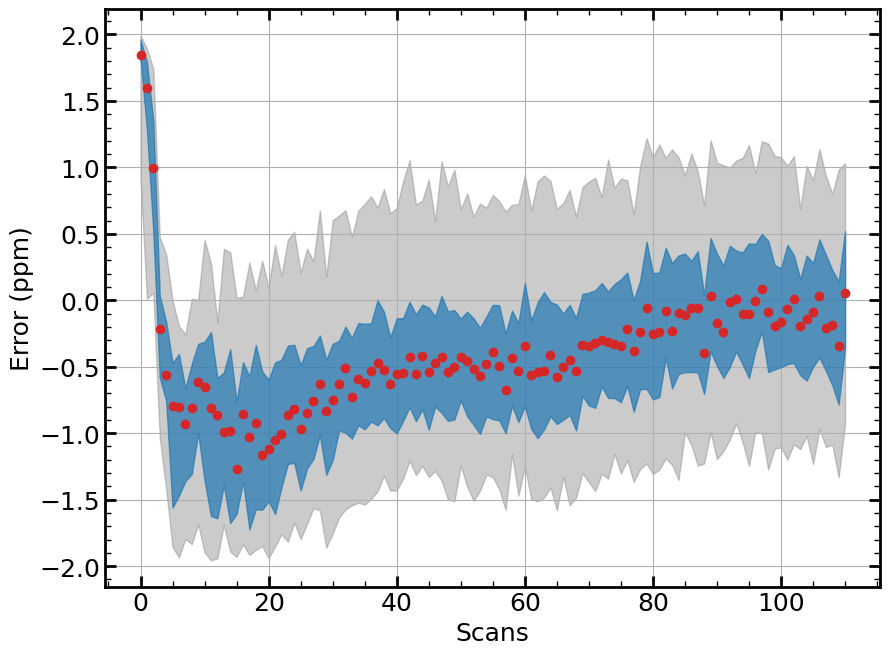

In [8]:
recal2D.plot.error_trend()

You can take a look at the recalibration results on a specific scan.
Here, for example, the 25th scan:

In [9]:
recal2D.recalibrations[25].summary()

CALIBRATION SUMMARY
-------------------
Calibration list             : new_eva_cross_calib.ref_w_isotopes
Number of data points        : 143
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: -1.65470e-11 B: 9.99999e-01
Root mean squared error (ppm): 0.713014
Calibration mz range         : 235.24, 1828.77



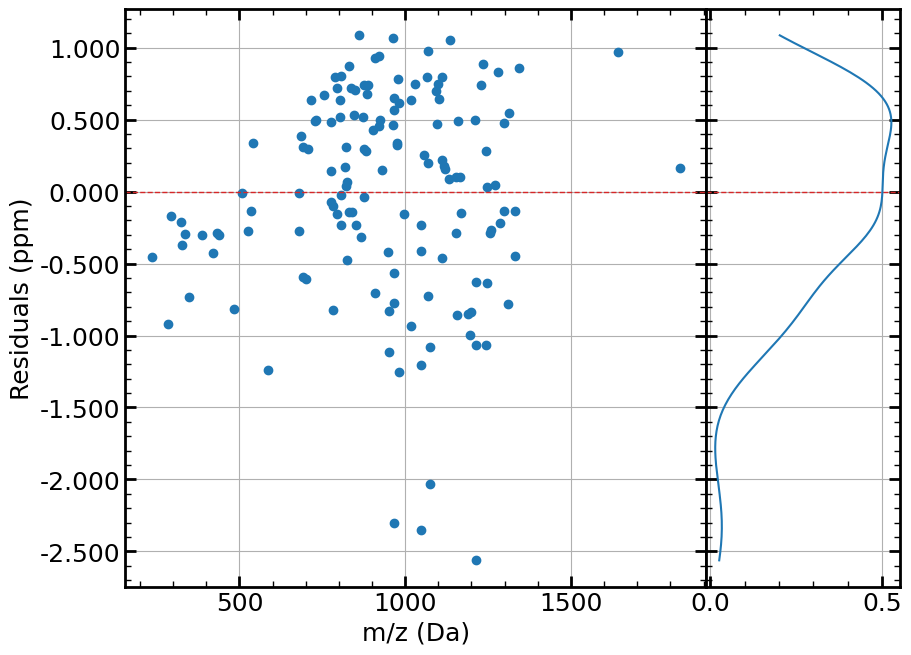

In [10]:
recal2D.plot.plot_residuals(25)

You can export the recalibration parameters and plot them as a function of the
scan number or time.

In [11]:
opt_params = recal2D.get_opt_params()
df = pd.DataFrame(opt_params, columns=["A", "B"])
df.head()

A         B
0 -1.102839e-09  1.000002
1 -1.343928e-09  1.000002
2 -3.914822e-10  1.000001
3  6.478558e-10  0.999999
4 -8.076569e-10  1.000000

<Figure size 1000x750 with 0 Axes>

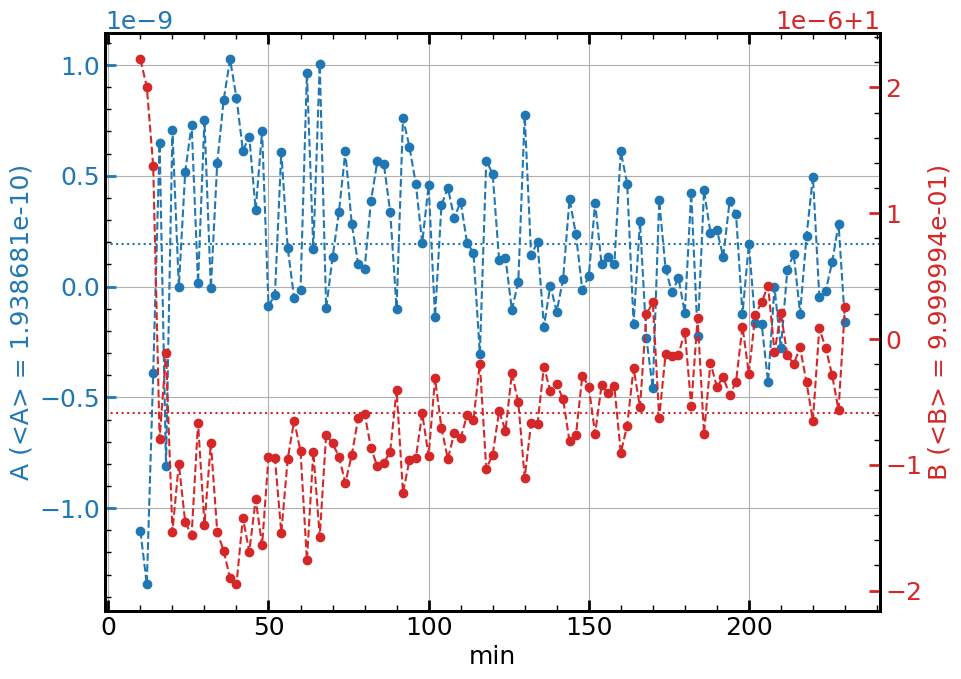

In [12]:
recal2D.plot.plot_parameters_trends(t0=10, dt=2, xlabel="min")

## Walking calibration of 2D data 

In this second example, the previously calibrated LC-MS data are recalibrated using the
walking calibration method. In that case, for each scan, the mz domain is split
in a set of segments and a calibration is applied to each segment.

First lets build a new `TimeDependentData` object with the previously
calibrated peaklists:

In [13]:
recal_data = recal2D.get_recalibrated_td_data()

Arguments are similar as the 2D Standard Calibration example, but you have to
select the `"walking"` method.
Moreover, we will use
the `'closest'` searching mode. This searching mode simply look for calibration points
with the smallest error. In that case it is relevant as we previously did a
first calibration. Otherwise, `"most_abundant`" searching mode is a better choice.

In the `recal_kws` you have to define the number of segments, or the segment's
edges to split the mz domain for the walking calibration.

In [14]:
wrecal2D = TimeDependentCalibration(
    td_data=recal_data,
    calibration_lists=cl,
    method="walking",
    lambda_parameter=2,
    searching_mode="closest",
    recal_kws=dict(fit_intercept=False, model="poly", deg=2, segment_size=100),
    verbose=True,
)


                     Scan: 0 (2500 peaks)  30 calib. points                     

Segment: [ 1194.2650;  1300.8232] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1513.9394;  1620.4976] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 13

Segment   0: 235.24 -> 341.80 (106.56)
    Calibrated: True
    # points  : 12
    Parameters: A: 5.37216e-09 B: 9.99998e-01
    RMSE (ppm): 0.073292

Segment   1: 341.80 -> 448.36 (106.56)
    Calibrated: True
    # points  : 9
    Parameters: A: 1.48711e-09 B: 1.00000e+00
    RMSE (ppm): 0.371350

Segment   2: 448.36 -> 554.92 (106.56)
    Calibrated: True
    # points  : 5
    Parameters: A: -5.98730e-09 B: 1.00000e+00
    RMSE (ppm): 0.414851

Segment   3: 554.92 -> 661.47 (106.56)
    Calibrated: True
    # points  : 2
    Parameters: A: 1.79067e-08 B: 9.99991e-01
    RMSE (

/Users/gvallver/git/pyc2mc/src/pyc2mc/processing/recalibration.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(np.sum(self.residuals_ppm**2) / (self.residuals.size - 2))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (149.02 -> 1990.81) Da
calib. list      : (235.24 -> 1620.50) Da
Mean segment size: 106.56 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (149.02 -> 1989.98) Da
calib. list      : (235.24 -> 1620.50) Da
Mean segment size: 106.56 Da

  self.


                    Scan: 3 (2500 peaks)  101 calib. points                     

Segment: [ 1054.3258;  1156.7113] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1259.0968;  1361.4823] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1566.2533;  1668.6388] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 16

Segment   0: 235.24 -> 337.63 (102.39)
    Calibrated: True
    # points  : 9
    Parameters: A: 2.79183e-10 B: 1.00000e+00
    RMSE (ppm): 0.242756

Segment   1: 337.63 -> 440.01 (102.39)
    Calibrated: True
    # points  : 17
    Parameters: A: -3.62789e-09 B: 1.00000e+00
    RMSE (ppm): 0.416011

Segment   2: 440.01 -> 542.40 (102.39)
    Calibrated: True
    # points  : 18
    Parameters: A: -6.65805e-09 B: 1.00000e+00
    RMSE (ppm): 0.501851

Segment   3: 542.40 -> 644.78 

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (153.15 -> 1977.97) Da
calib. list      : (305.28 -> 1642.16) Da
Mean segment size: 102.84 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                     Scan: 7 (2500 peaks)  98 calib. points                     

WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 305.28 -> 409.83 (104.54)
    Calibrated: True
    # points  : 11
    Parameters: A: 4.69782e-10 B: 1.00000e+00
    RMSE (ppm): 0.374580

Segment   1: 409.83 -> 514.37 (104.54)
    Calibrated: True
    # points  : 12
    Parameters: A: -4.88725e-09 B: 1.00000e+00
    RMSE (ppm): 0.499091

Segment   2: 514.37 -> 618.91 (104.54)
    Calibrated: True
    # points  : 10
    Parameters: A: 8.32033e-09 B: 9.99995e-01
    RMSE (ppm): 0.741242

Segment   3: 618.91 -> 723.45 (104.54)
    Calibrated: True
    # points  : 15
    Parameters: A: -1.82720e-08 B: 1.00001e+00
    RMSE (ppm): 0.405343

Segment   4: 723.45 -> 827.99 (104.54)
    Calibrated: True
    # points  : 17
    Parameters: A: -2.18068e-09 B: 1.00000e+00
    RMSE (ppm): 0.322035

Segment   5: 827.99 -> 932.53 (1

/Users/gvallver/git/pyc2mc/src/pyc2mc/processing/recalibration.py:198: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(np.sum(self.residuals_ppm**2) / (self.residuals.size - 2))



                    Scan: 11 (2500 peaks)  154 calib. points                    

Segment: [ 1566.2533;  1668.6388] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 16

Segment   0: 235.24 -> 337.63 (102.39)
    Calibrated: True
    # points  : 4
    Parameters: A: -3.98997e-09 B: 1.00000e+00
    RMSE (ppm): 0.308795

Segment   1: 337.63 -> 440.01 (102.39)
    Calibrated: True
    # points  : 9
    Parameters: A: -2.69199e-09 B: 1.00000e+00
    RMSE (ppm): 0.218946

Segment   2: 440.01 -> 542.40 (102.39)
    Calibrated: True
    # points  : 7
    Parameters: A: -2.23958e-08 B: 1.00001e+00
    RMSE (ppm): 0.473503

Segment   3: 542.40 -> 644.78 (102.39)
    Calibrated: True
    # points  : 5
    Parameters: A: 1.55951e-09 B: 1.00000e+00
    RMSE (ppm): 0.393550

Segment   4: 644.78 -> 747.17 (102.39)
    Calibrated: True
    # points  : 19
    Pa

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (191.18 -> 1977.98) Da
calib. list      : (235.24 -> 1394.51) Da
Mean segment size: 105.39 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 15 (2500 peaks)  171 calib. points                    

Segment: [ 1616.3034;  1722.5389] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1722.5389;  1828.7744] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 235.24 -> 341.48 (106.24)
    Calibrated: True
    # points  : 2
    Parameters: A: -1.00152e-08 B: 1.00000e+00
    RMSE (ppm): inf

Segment   1: 341.48 -> 447.71 (106.24)
    Calibrated: True
    # points  : 5
    Parameters: A: -5.02142e-09 B: 1.00000e+00
    RMSE (ppm): 0.285780

Segment   2: 447.71 -> 553.95 (106.24)
    Calibrated: True
    # points  : 7
    Parameters: A: -1.69839e-08 B: 1.00001e+00
    RMSE (ppm): 0.556821

Segment   3: 553.95 -> 660.18 (106.24)
    Calibrated: True
    # points  : 2
    Parameters: A: -8.27092e-09 B: 1.00001e+00
    RMSE (ppm

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (179.18 -> 1896.56) Da
calib. list      : (235.24 -> 1642.16) Da
Mean segment size: 100.49 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



peaklist         : (179.18 -> 1896.56) Da
calib. list      : (235.24 -> 1642.16) Da
Mean segment size: 100.49 Da

42 peaks are out of the calibration list range.
mz range before calib. list: 56.06
mz range above calib. list : 254.40

                    Scan: 18 (2500 peaks)  157 calib. points                    

Segment: [ 1616.3034;  1722.5389] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1722.5389;  1828.7744] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 235.24 -> 341.48 (106.24)
    Calibrated: True
    # points  : 9
    Parameters: A: 4.34352e-09 B: 9.99999e-01
    RMSE (ppm): 0.338675

Segment   1: 341.48 -> 447.71 (106.24)
    Calibrated: True
    # points  : 10
    Parameters: A: -1.31007e-08 B: 1.00001e+00
    RMSE (ppm): 0.571795

Segment   2: 447.71 -> 553.95 (106.24)
    Calibra

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (209.23 -> 1962.18) Da
calib. list      : (235.24 -> 1512.58) Da
Mean segment size: 106.45 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (195.21 -> 1952.81) Da
calib. list      : (285.26 -> 1642.16) Da
Mean segment size: 104.38 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 31 (2500 peaks)  226 calib. points                    

Segment: [  554.8288;   661.3578] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 12

Segment   0: 235.24 -> 341.77 (106.53)
    Calibrated: True
    # points  : 5
    Parameters: A: -6.39530e-09 B: 1.00000e+00
    RMSE (ppm): 0.121572

Segment   1: 341.77 -> 448.30 (106.53)
    Calibrated: True
    # points  : 2
    Parameters: A: -6.13463e-08 B: 1.00003e+00
    RMSE (ppm): inf

Segment   2: 448.30 -> 554.83 (106.53)
    Calibrated: True
    # points  : 5
    Parameters: A: -1.08379e-08 B: 1.00001e+00
    RMSE (ppm): 0.589744

Segment   3: 554.83 -> 661.36 (106.53)
    Calibrated: global
    Parameters: A: -1.60923e-10 B: 1.00000e+00
    RMSE (ppm): 0.807386

Segment   4: 661.36 -> 767.89 (106.53)
    Calibrated: True
    # points  : 16
    Parameters: A: -7.7428

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (181.19 -> 1977.98) Da
calib. list      : (235.24 -> 1513.59) Da
Mean segment size: 106.53 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))
/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (207.21 -> 1977.99) Da
calib. list      : (235.24 -> 1512.58) Da
Mean segment size: 106.45 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))


Calibrating peaklist: recalibrated_Analysis_0033.ascii
     2500 peaks (207.21 -> 1977.99) Da

peaklist         : (207.21 -> 1977.99) Da
calib. list      : (235.24 -> 1512.58) Da
Mean segment size: 106.45 Da

39 peaks are out of the calibration list range.
mz range before calib. list: 28.03
mz range above calib. list : 465.40

                    Scan: 33 (2500 peaks)  222 calib. points                    

Segment: [  536.7237;   637.2176] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1541.6632;  1642.1572] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 14

Segment   0: 235.24 -> 335.74 (100.49)
    Calibrated: True
    # points  : 5
    Parameters: A: -2.55265e-10 B: 1.00000e+00
    RMSE (ppm): 0.312173

Segment   1: 335.74 -> 436.23 (100.49)
    Calibrated: True
    # points  : 5
    Parameters: A: -1.25154e-

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (235.24 -> 1952.82) Da
calib. list      : (235.24 -> 1642.16) Da
Mean segment size: 100.49 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 35 (2500 peaks)  234 calib. points                    

Segment: [  542.3983;   644.7838] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1566.2533;  1668.6388] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 16

Segment   0: 235.24 -> 337.63 (102.39)
    Calibrated: True
    # points  : 6
    Parameters: A: -4.43883e-09 B: 1.00000e+00
    RMSE (ppm): 0.313273

Segment   1: 337.63 -> 440.01 (102.39)
    Calibrated: True
    # points  : 3
    Parameters: A: -1.21974e-08 B: 1.00001e+00
    RMSE (ppm): 0.150348

Segment   2: 440.01 -> 542.40 (102.39)
    Calibrated: True
    # points  : 6
    Parameters: A: -1.18045e-08 B: 1.00001e+00
    RMSE (ppm): 0.509942

Segment   3: 542.40 -> 644.78 (102.39)
    Calibrated: global
    Parameters: A: -1.44889e-10 B: 1.00000e+00
    RMSE (ppm): 0.780435

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (193.05 -> 1977.99) Da
calib. list      : (235.24 -> 1557.66) Da
Mean segment size: 101.72 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 39 (2500 peaks)  230 calib. points                    

Segment: [ 1510.0679;  1616.3034] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1722.5389;  1828.7744] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 235.24 -> 341.48 (106.24)
    Calibrated: True
    # points  : 5
    Parameters: A: -5.83294e-11 B: 1.00000e+00
    RMSE (ppm): 0.173932

Segment   1: 341.48 -> 447.71 (106.24)
    Calibrated: True
    # points  : 3
    Parameters: A: 9.91997e-11 B: 1.00000e+00
    RMSE (ppm): 0.017426

Segment   2: 447.71 -> 553.95 (106.24)
    Calibrated: True
    # points  : 5
    Parameters: A: -2.02611e-08 B: 1.00001e+00
    RMSE (ppm): 0.243697

Segment   3: 553.95 -> 660.18 (106.24)
    Calibrated: True
    # points  : 2
    Parameters: A: -7.38573e-07 B: 1.00043e+00
    RMSE 

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (207.21 -> 1977.99) Da
calib. list      : (235.24 -> 1471.55) Da
Mean segment size: 103.03 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 46 (2500 peaks)  242 calib. points                    

Segment: [ 1616.3034;  1722.5389] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1722.5389;  1828.7744] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 235.24 -> 341.48 (106.24)
    Calibrated: True
    # points  : 6
    Parameters: A: -3.22006e-09 B: 1.00000e+00
    RMSE (ppm): 0.236923

Segment   1: 341.48 -> 447.71 (106.24)
    Calibrated: True
    # points  : 4
    Parameters: A: -5.35791e-09 B: 1.00000e+00
    RMSE (ppm): 0.584831

Segment   2: 447.71 -> 553.95 (106.24)
    Calibrated: True
    # points  : 5
    Parameters: A: -2.08818e-08 B: 1.00001e+00
    RMSE (ppm): 0.442679

Segment   3: 553.95 -> 660.18 (106.24)
    Calibrated: True
    # points  : 2
    Parameters: A: -2.23148e-06 B: 1.00131e+00
    RMSE

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (233.23 -> 1977.98) Da
calib. list      : (235.24 -> 1642.16) Da
Mean segment size: 100.49 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 50 (2500 peaks)  251 calib. points                    

WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 16

Segment   0: 235.24 -> 337.63 (102.39)
    Calibrated: True
    # points  : 6
    Parameters: A: -6.03521e-10 B: 1.00000e+00
    RMSE (ppm): 0.310319

Segment   1: 337.63 -> 440.01 (102.39)
    Calibrated: True
    # points  : 4
    Parameters: A: -1.45753e-08 B: 1.00001e+00
    RMSE (ppm): 0.576316

Segment   2: 440.01 -> 542.40 (102.39)
    Calibrated: True
    # points  : 5
    Parameters: A: -1.74794e-08 B: 1.00001e+00
    RMSE (ppm): 0.652563

Segment   3: 542.40 -> 644.78 (102.39)
    Calibrated: True
    # points  : 2
    Parameters: A: -1.50309e-06 B: 1.00088e+00
    RMSE (ppm): inf

Segment   4: 644.78 -> 747.17 (102.39)
    Calibrated: True
    # points  : 12
    Parameters: A: -8.59356e-09 B: 1.00001e+00
    RMSE (ppm): 0.406145

Segment   5: 747.17 -> 849.55 (102.39)


/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (219.21 -> 1977.98) Da
calib. list      : (235.24 -> 1513.59) Da
Mean segment size: 106.53 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 58 (2500 peaks)  253 calib. points                    

WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 13

Segment   0: 285.26 -> 389.63 (104.38)
    Calibrated: True
    # points  : 4
    Parameters: A: 7.16095e-09 B: 9.99998e-01
    RMSE (ppm): 0.228866

Segment   1: 389.63 -> 494.01 (104.38)
    Calibrated: True
    # points  : 4
    Parameters: A: -2.96093e-09 B: 1.00000e+00
    RMSE (ppm): 0.860234

Segment   2: 494.01 -> 598.39 (104.38)
    Calibrated: True
    # points  : 5
    Parameters: A: 2.52779e-09 B: 9.99999e-01
    RMSE (ppm): 0.382967

Segment   3: 598.39 -> 702.77 (104.38)
    Calibrated: True
    # points  : 5
    Parameters: A: -1.95374e-08 B: 1.00001e+00
    RMSE (ppm): 0.307678

Segment   4: 702.77 -> 807.14 (104.38)
    Calibrated: True
    # points  : 27
    Parameters: A: 4.43803e-09 B: 9.99996e-01
    RMSE (ppm): 0.377141

Segment   5: 807.14 -> 911.52 (104.38

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (245.23 -> 1977.98) Da
calib. list      : (285.26 -> 1642.16) Da
Mean segment size: 104.38 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 60 (2500 peaks)  242 calib. points                    

Segment: [  590.7240;   692.5462] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1710.7681;  1812.5903] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 285.26 -> 387.08 (101.82)
    Calibrated: True
    # points  : 4
    Parameters: A: 7.81265e-09 B: 9.99998e-01
    RMSE (ppm): 0.146013

Segment   1: 387.08 -> 488.90 (101.82)
    Calibrated: True
    # points  : 2
    Parameters: A: -2.76966e-08 B: 1.00001e+00
    RMSE (ppm): inf

Segment   2: 488.90 -> 590.72 (101.82)
    Calibrated: True
    # points  : 7
    Parameters: A: 5.16948e-09 B: 9.99998e-01
    RMSE (ppm): 0.574199

Segment   3: 590.72 -> 692.55 (101.82)
    Calibrated: global
    Parameters: A: -8.27864e-11 B: 1.00000e+00
    RMSE (ppm): 0.772642

Segme

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (193.05 -> 1977.98) Da
calib. list      : (235.24 -> 1569.65) Da
Mean segment size: 102.65 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 64 (2500 peaks)  237 calib. points                    

Segment: [ 1710.7681;  1812.5903] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 285.26 -> 387.08 (101.82)
    Calibrated: True
    # points  : 3
    Parameters: A: -9.64194e-09 B: 1.00000e+00
    RMSE (ppm): 0.079900

Segment   1: 387.08 -> 488.90 (101.82)
    Calibrated: True
    # points  : 3
    Parameters: A: 1.19254e-08 B: 9.99995e-01
    RMSE (ppm): 0.147656

Segment   2: 488.90 -> 590.72 (101.82)
    Calibrated: True
    # points  : 6
    Parameters: A: 1.09078e-08 B: 9.99994e-01
    RMSE (ppm): 0.331666

Segment   3: 590.72 -> 692.55 (101.82)
    Calibrated: True
    # points  : 4
    Parameters: A: -3.75208e-09 B: 1.00000e+00
    RMSE (ppm): 0.240125

Segment   4: 692.55 -> 794.37 (101.82)
    Calibrated: True
    # points  : 15
    Par

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (205.20 -> 1981.17) Da
calib. list      : (235.24 -> 1642.16) Da
Mean segment size: 100.49 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 72 (2500 peaks)  252 calib. points                    

Segment: [ 1622.9721;  1725.8733] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 285.26 -> 388.16 (102.90)
    Calibrated: True
    # points  : 5
    Parameters: A: 1.61817e-09 B: 1.00000e+00
    RMSE (ppm): 0.379916

Segment   1: 388.16 -> 491.06 (102.90)
    Calibrated: True
    # points  : 4
    Parameters: A: 2.88739e-08 B: 9.99987e-01
    RMSE (ppm): 0.626164

Segment   2: 491.06 -> 593.96 (102.90)
    Calibrated: True
    # points  : 7
    Parameters: A: 7.24189e-09 B: 9.99996e-01
    RMSE (ppm): 0.599227

Segment   3: 593.96 -> 696.86 (102.90)
    Calibrated: global
    Parameters: A: -2.19535e-10 B: 1.00000e+00
    RMSE (ppm): 0.844990

Segment   4: 696.86 -> 799.76 (102.90)
    Calibrated: True
    # points  : 17
    Parameters: A: 5.622

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (191.18 -> 1981.17) Da
calib. list      : (235.24 -> 1620.50) Da
Mean segment size: 106.56 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 76 (2500 peaks)  235 calib. points                    

WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 285.26 -> 391.13 (105.88)
    Calibrated: True
    # points  : 4
    Parameters: A: 8.04607e-09 B: 9.99998e-01
    RMSE (ppm): 0.107529

Segment   1: 391.13 -> 497.01 (105.88)
    Calibrated: True
    # points  : 5
    Parameters: A: 7.16984e-09 B: 9.99997e-01
    RMSE (ppm): 0.469929

Segment   2: 497.01 -> 602.89 (105.88)
    Calibrated: True
    # points  : 7
    Parameters: A: 7.58327e-09 B: 9.99996e-01
    RMSE (ppm): 0.524635

Segment   3: 602.89 -> 708.76 (105.88)
    Calibrated: True
    # points  : 2
    Parameters: A: -2.12484e-09 B: 1.00000e+00
    RMSE (ppm): inf

Segment   4: 708.76 -> 814.64 (105.88)
    Calibrated: True
    # points  : 22
    Parameters: A: 8.65650e-10 B: 9.99999e-01
    RMSE (ppm): 0.413094

Segment   5: 814.64 -> 920.52 (105.88)
    

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (193.05 -> 1977.98) Da
calib. list      : (235.24 -> 1620.50) Da
Mean segment size: 106.56 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 79 (2500 peaks)  236 calib. points                    

Segment: [  542.3983;   644.7838] was not calibrated.
N points: 1
Global calibration will be applied.
Segment: [ 1566.2533;  1668.6388] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 16

Segment   0: 235.24 -> 337.63 (102.39)
    Calibrated: True
    # points  : 4
    Parameters: A: 7.18331e-10 B: 9.99999e-01
    RMSE (ppm): 0.156585

Segment   1: 337.63 -> 440.01 (102.39)
    Calibrated: True
    # points  : 2
    Parameters: A: 3.45959e-08 B: 9.99985e-01
    RMSE (ppm): inf

Segment   2: 440.01 -> 542.40 (102.39)
    Calibrated: True
    # points  : 5
    Parameters: A: -7.52714e-09 B: 1.00000e+00
    RMSE (ppm): 0.603134

Segment   3: 542.40 -> 644.78 (102.39)
    Calibrated: global
    Parameters: A: -2.43809e-10 B: 1.00000e+00
    RMSE (ppm): 0.874592

Segme

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (247.24 -> 1981.17) Da
calib. list      : (325.29 -> 1642.16) Da
Mean segment size: 101.30 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))


Segment: [  542.3983;   644.7838] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 16

Segment   0: 235.24 -> 337.63 (102.39)
    Calibrated: True
    # points  : 4
    Parameters: A: -2.70423e-09 B: 1.00000e+00
    RMSE (ppm): 0.086999

Segment   1: 337.63 -> 440.01 (102.39)
    Calibrated: True
    # points  : 3
    Parameters: A: -5.32929e-09 B: 1.00000e+00
    RMSE (ppm): 0.087728

Segment   2: 440.01 -> 542.40 (102.39)
    Calibrated: True
    # points  : 6
    Parameters: A: -2.18380e-08 B: 1.00001e+00
    RMSE (ppm): 0.513641

Segment   3: 542.40 -> 644.78 (102.39)
    Calibrated: global
    Parameters: A: -2.47436e-10 B: 1.00000e+00
    RMSE (ppm): 0.813510

Segment   4: 644.78 -> 747.17 (102.39)
    Calibrated: True
    # points  : 5
    Parameters: A: -9.87868e-09 B: 1.00001e+00
    RMSE (ppm): 0.302527

Segment   5: 747.17 -> 849.55 (1

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (193.05 -> 1977.98) Da
calib. list      : (235.24 -> 1642.16) Da
Mean segment size: 100.49 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))


WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 16

Segment   0: 235.24 -> 337.63 (102.39)
    Calibrated: True
    # points  : 4
    Parameters: A: 2.22185e-09 B: 9.99999e-01
    RMSE (ppm): 0.192015

Segment   1: 337.63 -> 440.01 (102.39)
    Calibrated: True
    # points  : 2
    Parameters: A: -4.24923e-08 B: 1.00002e+00
    RMSE (ppm): inf

Segment   2: 440.01 -> 542.40 (102.39)
    Calibrated: True
    # points  : 4
    Parameters: A: 1.31891e-08 B: 9.99993e-01
    RMSE (ppm): 0.440384

Segment   3: 542.40 -> 644.78 (102.39)
    Calibrated: True
    # points  : 2
    Parameters: A: 6.56859e-08 B: 9.99962e-01
    RMSE (ppm): inf

Segment   4: 644.78 -> 747.17 (102.39)
    Calibrated: True
    # points  : 8
    Parameters: A: -9.54981e-09 B: 1.00001e+00
    RMSE (ppm): 0.550477

Segment   5: 747.17 -> 849.55 (102.39)
    Calibrated: True
    # points  : 27
    Parameters: A: 1.54019e-09 B: 9.99999e-01
    RM

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (193.05 -> 1879.13) Da
calib. list      : (285.26 -> 1642.16) Da
Mean segment size: 104.38 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                    Scan: 98 (2500 peaks)  233 calib. points                    

Segment: [  602.8879;   708.7647] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 285.26 -> 391.13 (105.88)
    Calibrated: True
    # points  : 4
    Parameters: A: -1.37634e-09 B: 1.00000e+00
    RMSE (ppm): 0.258635

Segment   1: 391.13 -> 497.01 (105.88)
    Calibrated: True
    # points  : 4
    Parameters: A: 3.00747e-09 B: 9.99999e-01
    RMSE (ppm): 0.232955

Segment   2: 497.01 -> 602.89 (105.88)
    Calibrated: True
    # points  : 4
    Parameters: A: 9.52545e-09 B: 9.99995e-01
    RMSE (ppm): 0.031522

Segment   3: 602.89 -> 708.76 (105.88)
    Calibrated: global
    Parameters: A: -1.92688e-10 B: 1.00000e+00
    RMSE (ppm): 0.850622

Segment   4: 708.76 -> 814.64 (105.88)
    Calibrated: True
    # points  : 17
    Parameters: A: 5.11

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (193.05 -> 1977.97) Da
calib. list      : (285.26 -> 1569.65) Da
Mean segment size: 107.03 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))


Calibrating peaklist: recalibrated_Analysis_0101.ascii
     2500 peaks (219.07 -> 1890.72) Da
5 peaks are out of the calibration list range.
mz range before calib. list: 16.18
mz range above calib. list : 17.31

                   Scan: 101 (2500 peaks)  225 calib. points                    

Segment: [ 1706.3545;  1812.5903] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 14

Segment   0: 325.29 -> 431.52 (106.24)
    Calibrated: True
    # points  : 4
    Parameters: A: 1.77837e-09 B: 9.99999e-01
    RMSE (ppm): 0.244268

Segment   1: 431.52 -> 537.76 (106.24)
    Calibrated: True
    # points  : 5
    Parameters: A: 6.55049e-09 B: 9.99997e-01
    RMSE (ppm): 0.093056

Segment   2: 537.76 -> 644.00 (106.24)
    Calibrated: True
    # points  : 4
    Parameters: A: 1.01973e-09 B: 9.99999e-01
    RMSE (ppm): 0.843860

Segment   3: 644.00 -> 750.

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (219.07 -> 1977.99) Da
calib. list      : (285.26 -> 1569.65) Da
Mean segment size: 107.03 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                   Scan: 105 (2500 peaks)  224 calib. points                    

WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 285.26 -> 391.13 (105.88)
    Calibrated: True
    # points  : 4
    Parameters: A: 3.97206e-10 B: 1.00000e+00
    RMSE (ppm): 0.118940

Segment   1: 391.13 -> 497.01 (105.88)
    Calibrated: True
    # points  : 5
    Parameters: A: 6.66393e-09 B: 9.99997e-01
    RMSE (ppm): 0.655914

Segment   2: 497.01 -> 602.89 (105.88)
    Calibrated: True
    # points  : 5
    Parameters: A: 4.21113e-09 B: 9.99998e-01
    RMSE (ppm): 0.540403

Segment   3: 602.89 -> 708.76 (105.88)
    Calibrated: True
    # points  : 2
    Parameters: A: -2.99905e-07 B: 1.00020e+00
    RMSE (ppm): inf

Segment   4: 708.76 -> 814.64 (105.88)
    Calibrated: True
    # points  : 16
    Parameters: A: 6.58785e-09 B: 9.99995e-01
    RMSE (ppm): 0.466383

Segment   5: 814.64 -> 920.52 (105.88)
    

/Users/gvallver/git/pyc2mc/src/pyc2mc/time_dependent/recalibration.py:402: UserWarning: The range of the calibration list is shorter than the range of the peaklist by more than the tolerance Peaks out of the calibration range will be calibrated.
peaklist         : (192.38 -> 1981.17) Da
calib. list      : (285.26 -> 1642.16) Da
Mean segment size: 104.38 Da

  self._calibrated_peaklists.append(recal.recalibrate(peaklist))



                   Scan: 109 (2500 peaks)  237 calib. points                    

Segment: [ 1725.8733;  1828.7744] was not calibrated.
N points: 1
Global calibration will be applied.
WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 285.26 -> 388.16 (102.90)
    Calibrated: True
    # points  : 3
    Parameters: A: 2.36462e-09 B: 1.00000e+00
    RMSE (ppm): 0.018421

Segment   1: 388.16 -> 491.06 (102.90)
    Calibrated: True
    # points  : 3
    Parameters: A: 1.23051e-08 B: 9.99995e-01
    RMSE (ppm): 0.231087

Segment   2: 491.06 -> 593.96 (102.90)
    Calibrated: True
    # points  : 9
    Parameters: A: 9.96131e-09 B: 9.99995e-01
    RMSE (ppm): 0.388060

Segment   3: 593.96 -> 696.86 (102.90)
    Calibrated: True
    # points  : 4
    Parameters: A: -5.50467e-08 B: 1.00004e+00
    RMSE (ppm): 0.344556

Segment   4: 696.86 -> 799.76 (102.90)
    Calibrated: True
    # points  : 23
    Para

As previsouly, we can take a look at the error trend on the calibration points 
after the walking recalibration. If you compare with the previous standard
recalibration, you can see that the mean and the dispersion on the error are
reduced.

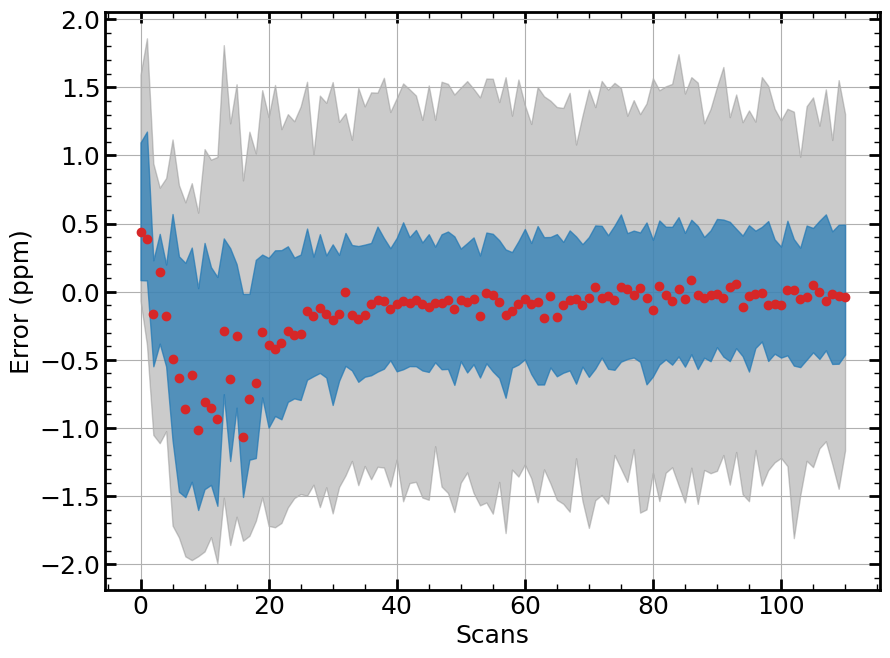

In [15]:
wrecal2D.plot.error_trend()

You can take a look at the recalibration results on a specific scan.
As it is a walking recalibration, now you have the detail of the calibration
parameters for each segments on each scans.
Here, for example, the 25th scan:

In [16]:
wrecal2D.recalibrations[25].summary()

WALKING CALIBRATION SUMMARY
---------------------------
Regression model: RecalibrationModels.POLYNOMIAL
# segments      : 15

Segment   0: 235.24 -> 341.48 (106.24)
    Calibrated: True
    # points  : 6
    Parameters: A: -3.20957e-09 B: 1.00000e+00
    RMSE (ppm): 0.283915

Segment   1: 341.48 -> 447.71 (106.24)
    Calibrated: True
    # points  : 5
    Parameters: A: -3.88625e-09 B: 1.00000e+00
    RMSE (ppm): 0.128333

Segment   2: 447.71 -> 553.95 (106.24)
    Calibrated: True
    # points  : 7
    Parameters: A: -1.49950e-08 B: 1.00001e+00
    RMSE (ppm): 0.586458

Segment   3: 553.95 -> 660.18 (106.24)
    Calibrated: global
    Parameters: A: 7.60762e-11 B: 1.00000e+00
    RMSE (ppm): 0.877701

Segment   4: 660.18 -> 766.42 (106.24)
    Calibrated: True
    # points  : 23
    Parameters: A: -9.40415e-09 B: 1.00001e+00
    RMSE (ppm): 0.341681

Segment   5: 766.42 -> 872.65 (106.24)
    Calibrated: True
    # points  : 47
    Parameters: A: -2.40123e-09 B: 1.00000e+00
    RMSE

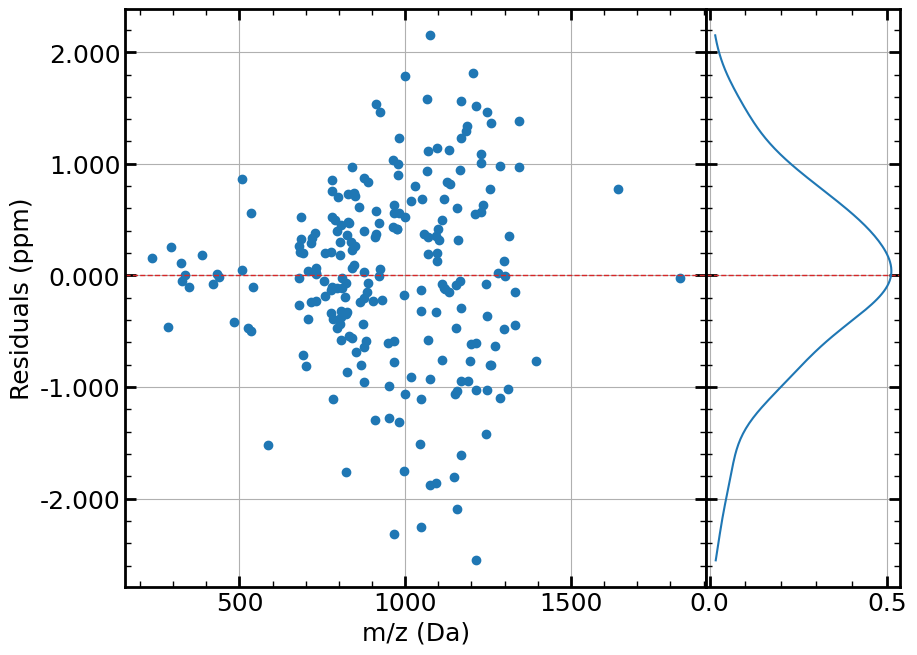

In [17]:
wrecal2D.plot.plot_residuals(25)

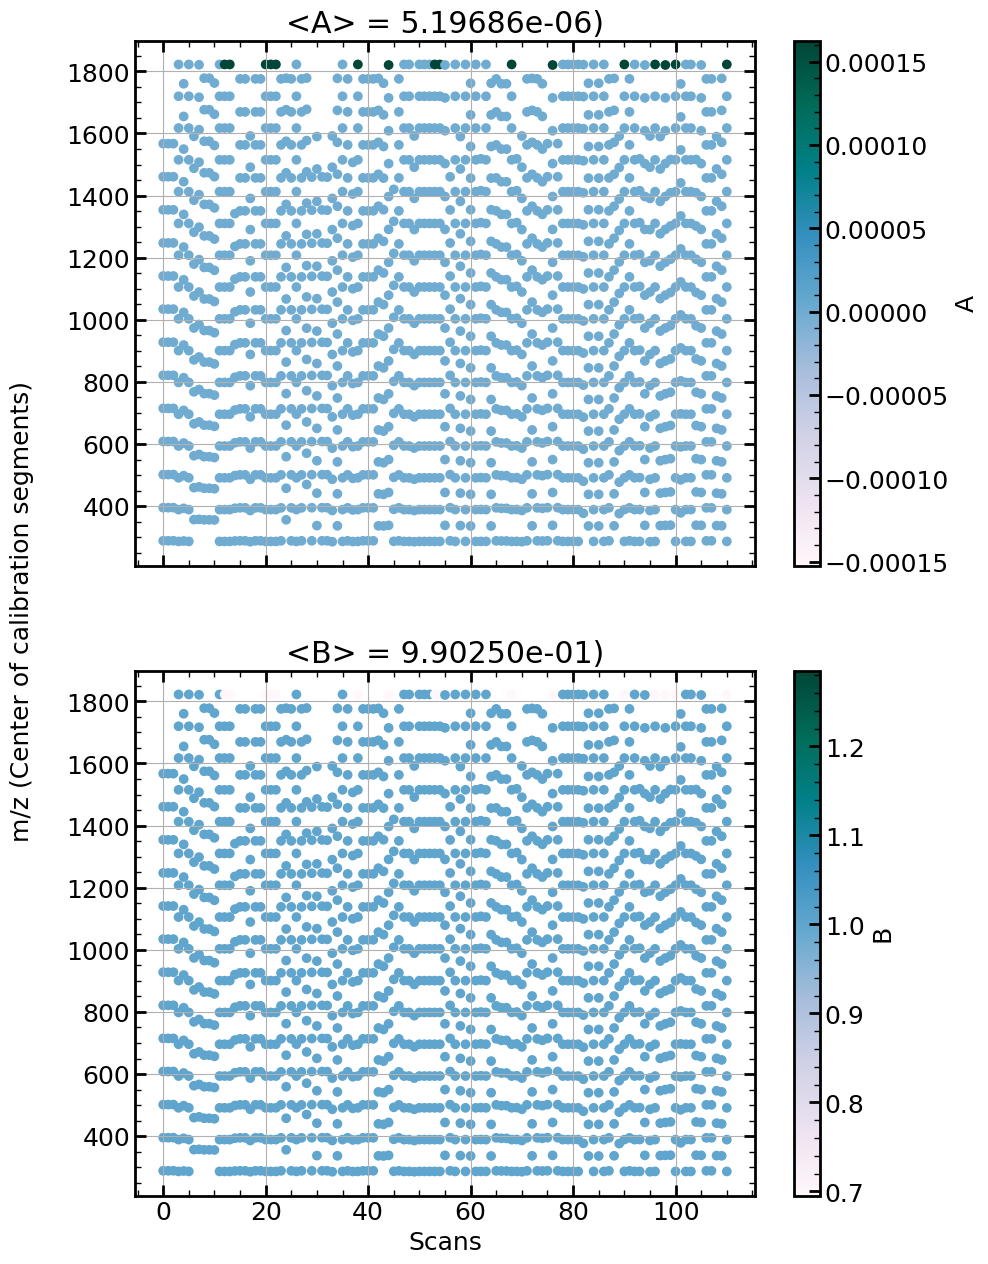

In [18]:
fig = plt.figure(figsize=(10, 15))
wrecal2D.plot.plot_parameters_trends(fig=fig)

Get the calibrated time dependent data:

In [19]:
wcal_EVA = wrecal2D.get_recalibrated_td_data()

The next steps will certainly be the attribution:

```python
wcal_EVA.attribute(
    formula_grid=...
    algo=...
    lambda_parameter=...
)
```

## Recalibration from TimeDependentData

On other option to perform the time dependent recalibration is to call the 
`recalibrate()` method directly from the `TimeDependantData` object. Here
is how it works.

First you read the data as previously:

```python
EVA_cross_set = TimeDependentData.from_directory(
    directory_path='data/EVA_Cross',
    verbose=False
)
```

Then you apply the calibration directly. All arguments are passed to 
the `TimeDependentCalibration` we used above.

```python
recal_data, recal2D = EVA_cross_set.recalibrate(
    calibration_list=cl,
    lambda_parameter=2,
    searching_mode="most_abundant_corrected",
    recal_kws=dict(fit_intercept=False, model="poly", deg=2),
    verbose=True,
    save_caliblist=False,
)
```

If `save_caliblist` is set to `True`, for each scan, the used calibration list
is saved in csv format.

* `recal_data` are the recalibrated time dependent data
* `recal2D` is the `TimeDependentCalibration` object.